Random Seeding & Enable Determinism to produce replicable results

In [85]:
import tensorflow as tf
from tensorflow import keras

tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

Importing libraries and modules

In [86]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from keras import layers
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.utils import to_categorical

print(tf.__version__) 

2.15.0


In [87]:
features = ["Neck_flexion", "Neck_left-ward_tilt", "Neck_right-ward_rotation", "LeftElbow_flexion", "RightElbow_flexion", "LeftKnee_flexion", "RightKnee_flexion", "Thorax_extension", "Thorax_lateral_flexion_rotation"]

Load Dataset

In [88]:
filename = "mocap dataset.csv"
filepath = f"/home/RUS_CIP/st179677/project/dataset/5 users/{filename}"

df = pd.read_csv(filepath)
df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)
df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)



df = df[features]
df

,Neck_flexion,Neck_left-ward_tilt,Neck_right-ward_rotation,LeftElbow_flexion,RightElbow_flexion,LeftKnee_flexion,RightKnee_flexion,Thorax_extension,Thorax_lateral_flexion_rotation
0,6.532609,3.413257,-9.364980,2.198468,6.993781,-20.284060,0.000000,3.393499,5.001980
1,6.557388,3.534179,-9.039681,1.893722,5.846905,-20.223180,-0.048457,3.442418,4.944012
2,6.557417,3.569129,-8.875886,1.806886,5.292946,-20.183570,0.000000,3.458419,4.921090
3,6.584455,3.591450,-8.561050,1.691654,4.553975,-20.087540,-0.068528,3.467804,4.882923
4,6.645496,3.591949,-8.246242,1.641156,3.538838,-19.995180,0.000000,3.469554,4.849421
...,...,...,...,...,...,...,...,...,...
50744,-16.670490,0.316716,-5.353024,15.269830,6.520080,0.000000,-17.106140,6.845329,-1.817957
50745,-14.910760,0.640351,-6.052200,14.761030,6.830098,-0.044235,-16.247700,6.842291,-1.589802
50746,-14.163410,0.802677,-6.308852,14.491450,6.867785,-0.044235,-15.807290,6.873380,-1.477548
50747,-12.880330,1.093821,-6.555832,13.773880,6.764049,0.000000,-14.789060,6.955138,-1.295967


In [89]:
ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(df),columns = df.columns, index=df.index)

df

# scaler = MinMaxScaler()
# # scaler = scaler.fit(df)

# df = scaler.fit_transform(df)
# df

,Neck_flexion,Neck_left-ward_tilt,Neck_right-ward_rotation,LeftElbow_flexion,RightElbow_flexion,LeftKnee_flexion,RightKnee_flexion,Thorax_extension,Thorax_lateral_flexion_rotation
0,1.141072,0.134815,-0.930625,-0.869576,-0.741033,0.087011,0.923320,0.531580,0.854031
1,1.142813,0.151861,-0.903030,-0.879006,-0.771593,0.089203,0.921460,0.533954,0.847211
2,1.142815,0.156788,-0.889135,-0.881694,-0.786354,0.090629,0.923320,0.534730,0.844514
3,1.144715,0.159935,-0.862426,-0.885260,-0.806045,0.094088,0.920689,0.535186,0.840023
4,1.149004,0.160005,-0.835721,-0.886822,-0.833095,0.097414,0.923320,0.535271,0.836081
...,...,...,...,...,...,...,...,...,...
50744,-0.489302,-0.301695,-0.590284,-0.465071,-0.753656,0.817460,0.266742,0.699089,0.051579
50745,-0.365654,-0.256073,-0.649596,-0.480816,-0.745395,0.815867,0.299691,0.698941,0.078425
50746,-0.313141,-0.233191,-0.671369,-0.489159,-0.744391,0.815867,0.316595,0.700450,0.091633
50747,-0.222985,-0.192149,-0.692320,-0.511365,-0.747155,0.817460,0.355678,0.704417,0.112998


Plotting Distribution of Classes

In [90]:
labels_filename = "labels.xlsx"
labels_filepath = f"/home/RUS_CIP/st179677/project/dataset/5 users/{labels_filename}"
labels_df = pd.read_excel(labels_filepath)
print(labels_df)

# # Sort the labels for better visualization
# sorted_labels = label_counts.index.sort_values()

# # Plot the distribution
# plt.bar(sorted_labels, label_counts[sorted_labels])
# plt.xlabel('Class Labels')
# plt.ylabel('Frequency')
# plt.title('Distribution of Class Labels')
# plt.show()

       labels
0           0
1           0
2           0
3           0
4           0
...       ...
50744       4
50745       4
50746       4
50747       4
50748       4

[50749 rows x 1 columns]


In [91]:
# Create 51 empty lists with names X0 to X50
X0, X1, X2, X3, X4, X5, X6, X7, X8, y = ([] for _ in range(10))

# # Print the lists for verification
# for i, X_list in enumerate([X0, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, X27, X28, X29, X30, X31, X32, X33, X34, X35, X36, X37, X38, X39, X40, X41, X42, X43, X44, X45, X46, X47, X48, X49, X50, y]):
#     print(f"{X_list=}")


Create Sequences from Dataset

In [92]:
timesteps = 100

# Iterate over the range of rows in df
for i in range(0, df.shape[0] - timesteps):
    for j in range(9):  # Loop for column indexing
        globals()[f'X{j}'].append(df.iloc[i:i + timesteps, j])

# Iterate over the range of rows in labels_df
for i in range(0, labels_df.shape[0] - timesteps):
     y.append(labels_df.iloc[i + timesteps, 0])

In [93]:
type(y)

list

In [94]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [95]:
X0, X1, X2, X3, X4, X5, X6, X7, X8, y = np.array(X0),  np.array(X1),  np.array(X2),  np.array(X3),  np.array(X4),  np.array(X5),  np.array(X6),  np.array(X7),  np.array(X8), np.array(y)

In [96]:
X0.shape

(50649, 100)

In [97]:
X0

array([[ 1.1410717 ,  1.14281281,  1.14281484, ...,  1.35015862,
         1.34876406,  1.34471973],
       [ 1.14281281,  1.14281484,  1.14471468, ...,  1.34876406,
         1.34471973,  1.34129289],
       [ 1.14281484,  1.14471468,  1.14900374, ...,  1.34471973,
         1.34129289,  1.3383083 ],
       ...,
       [-1.96984335, -2.01627046, -2.06060367, ..., -0.62553556,
        -0.48930163, -0.36565362],
       [-2.01627046, -2.06060367, -2.11846084, ..., -0.48930163,
        -0.36565362, -0.31314083],
       [-2.06060367, -2.11846084, -2.14827934, ..., -0.36565362,
        -0.31314083, -0.2229848 ]])

In [98]:
X = np.stack((X0, X1, X2, X3, X4, X5, X6, X7, X8), axis=2)

In [99]:
X.shape

(50649, 100, 9)

In [100]:
y.shape

(50649,)

In [101]:
# convert labels to one hot encoded

encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

# encode integers to one hot encoded values
Y = to_categorical(encoded_Y)
print(Y)
print(Y.shape)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]
(50649, 5)


In [102]:
#splitting dataset into train, test and validation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

print("X train :",X_train.shape)
print("y train:", y_train.shape)
print("X test :", X_test.shape)
print("y test :" ,y_test.shape)
print("X val :" ,X_val.shape)
print("y val :" ,y_val.shape)

# print(X_train)
# print(X_test)
# print(y_train) 
# print(y_val)



X train : (36467, 100, 9)
y train: (36467, 5)
X test : (10130, 100, 9)
y test : (10130, 5)
X val : (4052, 100, 9)
y val : (4052, 5)


In [103]:
# from tensorflow.keras.optimizers import Adam

# def model_builder(hp):
#     model = tf.keras.Sequential()

#     hp_gru_neurons = hp.Int('GRU_layer', min_value=32, max_value=64, step=32)
#     hp_dense_neurons_l1 = hp.Int('Dense_layer_1', min_value=10, max_value=20, step=5)
#     hp_dense_neurons_l2 = hp.Int('Dense_layer_2', min_value=10, max_value=20, step=5)
#     hp_dropout = hp.Choice('dropout', values=[0.0,0.1])
#     hp_lr = hp.Choice('learning_rate', values=[1e-2,1e-3,1e-4])

#     model.add(GRU(hp_gru_neurons, input_shape=(300,51), dropout=hp_dropout))
#     model.add(Dense(hp_dense_neurons_l1, activation='relu'))
#     model.add(Dense(hp_dense_neurons_l2, activation='relu'))
#     model.add(Dense(5, activation='sigmoid'))

#     model.compile(optimizer=Adam(learning_rate=hp_lr),loss='categorical_crossentropy', metrics=['accuracy'])
    
#     return model

In [104]:
# import keras_tuner as kt

# tuner = kt.GridSearch(model_builder,
#                      objective='val_accuracy',
#                      seed=1,
#                      max_retries_per_trial=3,
#                      max_consecutive_failed_trials=5
#                      )

In [105]:
# from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1)

In [106]:
# tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val) , callbacks=[early_stopping])

In [107]:
# best_hps = tuner.get_best_hyperparameters()[0]
# print(best_hps.values)

In [108]:
# from keras.callbacks import ModelCheckpoint, EarlyStopping
# from keras.callbacks import TensorBoard
# import time

# NAME = "GRU-model-{}".format(int(time.time()))

# tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))

# model = tuner.hypermodel.build(best_hps)
# history = model.fit(X_train, y_train, epochs=60, validation_data=[X_val, y_val],callbacks=[early_stopping, tensorboard])

In [109]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.callbacks import TensorBoard
import time

NAME = "GRU-model-{}".format(int(time.time()))

tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))

filepath_1 = '/home/RUS_CIP/st179677/project/model/models/gru_best_model.h5'
checkpoint = ModelCheckpoint(filepath=filepath_1, 
                             monitor='val_accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='max')

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1)

callbacks_list = [early_stopping, tensorboard]

In [110]:
# gru_model = rnn_model(16, 2, 0.5, 10, 2, 60, 'gru')
# gru_model.summary()

gru_model = Sequential()
gru_model.add(layers.GRU(16, input_shape=(100,9)))
# gru_model.add(layers.GRU(32, input_shape=(51,32), dropout=0.5))
gru_model.add(Dense(10, activation='relu'))
gru_model.add(Dense(10, activation='relu'))
gru_model.add(Dense(5, activation='sigmoid'))
gru_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 16)                1296      
                                                                 
 dense_6 (Dense)             (None, 10)                170       
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 5)                 55        
                                                                 
Total params: 1631 (6.37 KB)
Trainable params: 1631 (6.37 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


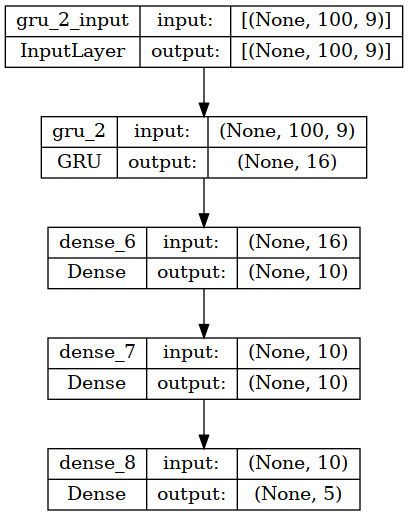

In [111]:
from keras.utils import plot_model
plot_model(gru_model,show_shapes= True, show_layer_names= True, to_file='/home/RUS_CIP/st179677/project/model/GRU.png')

In [112]:
#GRU model
from keras.optimizers import Adam

adam = Adam(learning_rate=0.001)
# chk = ModelCheckpoint('best_model.pkl', monitor='val_acc', save_best_only=True, mode='max', verbose=1)
gru_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
gru_history=gru_model.fit(X_train, y_train ,validation_data=([X_val], y_val), epochs=100, batch_size=48, callbacks=callbacks_list)

Epoch 1/100
760/760 [==============================] - 5s 5ms/step - loss: 0.5630 - accuracy: 0.8100 - val_loss: 0.2751 - val_accuracy: 0.9047
Epoch 2/100
760/760 [==============================] - 4s 5ms/step - loss: 0.2231 - accuracy: 0.9295 - val_loss: 0.1769 - val_accuracy: 0.9388
Epoch 3/100
760/760 [==============================] - 4s 5ms/step - loss: 0.1555 - accuracy: 0.9507 - val_loss: 0.1286 - val_accuracy: 0.9573
Epoch 4/100
760/760 [==============================] - 4s 5ms/step - loss: 0.1181 - accuracy: 0.9631 - val_loss: 0.0989 - val_accuracy: 0.9687
Epoch 5/100
760/760 [==============================] - 4s 5ms/step - loss: 0.0961 - accuracy: 0.9704 - val_loss: 0.0829 - val_accuracy: 0.9761
Epoch 6/100
760/760 [==============================] - 4s 5ms/step - loss: 0.0773 - accuracy: 0.9765 - val_loss: 0.0698 - val_accuracy: 0.9812
Epoch 7/100
760/760 [==============================] - 4s 5ms/step - loss: 0.0691 - accuracy: 0.9797 - val_loss: 0.0568 - val_accuracy: 0.9835

In [113]:
# %tensorboard --logdir='logs/'

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


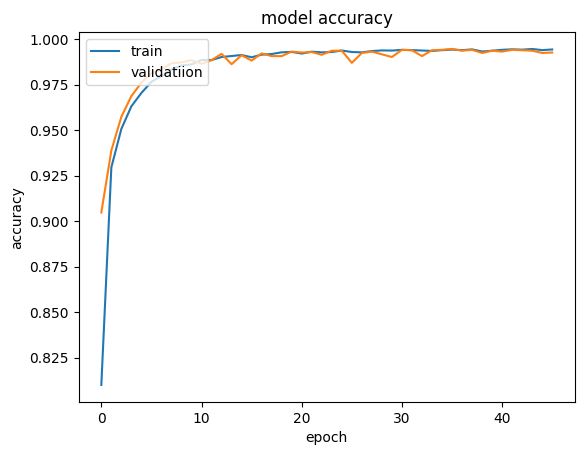

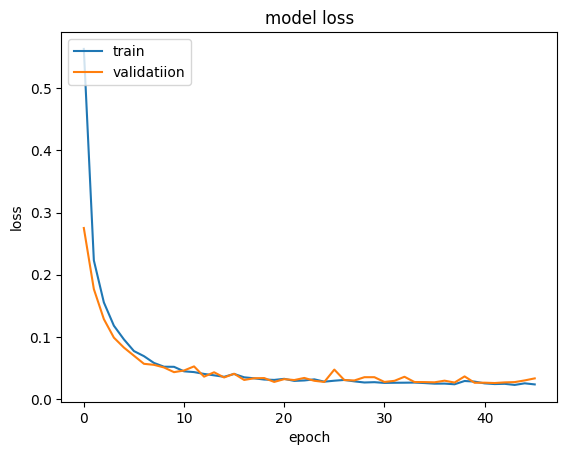

In [114]:
# list all data in history
print(gru_history.history.keys())

# summarize history for accuracy
plt.plot(gru_history.history['accuracy'])
plt.plot(gru_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validatiion'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(gru_history.history['loss'])
plt.plot(gru_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validatiion'], loc='upper left')
plt.show()

In [115]:
#predicting on test datset
from keras.models import load_model
from sklearn.metrics import accuracy_score
# model = load_model(model_filepath)
gru_classify_x=gru_model.predict(X_test) 
# print(classify_x)
gru_classes_x=np.argmax(gru_classify_x,axis=1)
y_test= np.argmax(y_test,axis=1)
print(gru_classes_x)
accuracy = accuracy_score(y_test, gru_classes_x)
accuracy

317/317 [==============================] - 1s 1ms/step
[0 0 0 ... 0 0 0]


0.8912142152023692

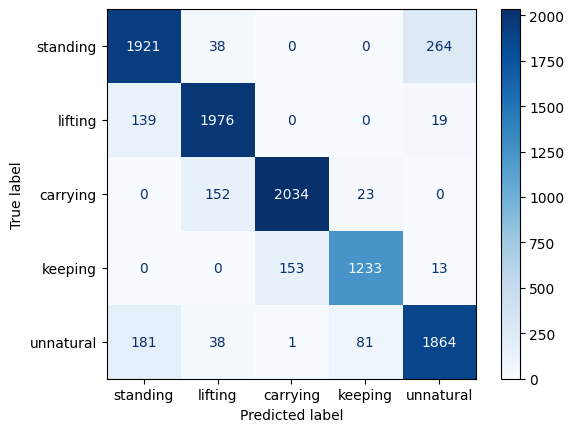

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      2223
           1       0.90      0.93      0.91      2134
           2       0.93      0.92      0.93      2209
           3       0.92      0.88      0.90      1399
           4       0.86      0.86      0.86      2165

    accuracy                           0.89     10130
   macro avg       0.89      0.89      0.89     10130
weighted avg       0.89      0.89      0.89     10130



In [116]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


labels = ["standing", "lifting", "carrying", "keeping", "unnatural"]

cm = confusion_matrix(y_test, gru_classes_x)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

print(classification_report(y_test, gru_classes_x))

In [117]:
# model_filepath=f'/home/RUS_CIP/st179677/project/model/{round(accuracy*100,2)}_gru_model.keras'

# gru_model.save(model_filepath)
# gru_model.save(model_filepath, save_format='h5')